In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [2]:
df = pd.read_csv("output/caratPrice.csv")
df.head()

,carat,price
0,0.20,365.166667
1,0.21,380.222222
2,0.22,391.400000
3,0.23,486.143345
4,0.24,505.185039


### Model 1 - Linear regression

In [3]:
model_lr = CmdStanModel(stan_file='model_lr.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
result_lr = model_lr.sample(data=dict(N=len(df), x=df.carat.values, y=df.price.values))
print(result_lr.draws_pd())

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -2680.08       0.985291    0.812574          2.0           3.0   
1    -2680.08       0.814372    0.812574          1.0           3.0   
2    -2680.73       0.941182    0.812574          2.0           3.0   
3    -2684.11       0.722115    0.812574          2.0           3.0   
4    -2680.21       1.000000    0.812574          2.0           3.0   
...       ...            ...         ...          ...           ...   
3995 -2680.10       0.905621    0.789464          2.0           3.0   
3996 -2681.11       0.907221    0.789464          2.0           3.0   
3997 -2682.60       0.860126    0.789464          2.0           3.0   
3998 -2680.03       1.000000    0.789464          2.0           3.0   
3999 -2680.79       0.786800    0.789464          2.0           3.0   

      divergent__  energy__    alpha     beta    sigma  ...  y_sim[264]  \
0             0.0   2680.13  194.159  5600.92  1366.12  ...     20785.0

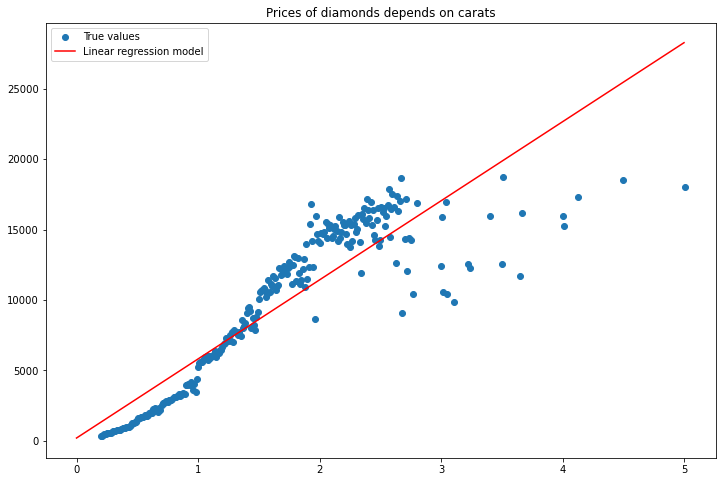

In [5]:
df_alpha = pd.DataFrame(result_lr.stan_variables()["alpha"])
df_beta = pd.DataFrame(result_lr.stan_variables()["beta"])
df_sigma = pd.DataFrame(result_lr.stan_variables()["sigma"])

alpha = df_alpha.mean().to_numpy()
beta = df_beta.mean().to_numpy()
sigma= df_sigma.mean().to_numpy()

x = np.linspace(0, 5, 100)
y = alpha + beta*x

plt.figure(figsize=[12, 8])
plt.scatter(df.carat.values, df.price.values)
plt.plot(x, y, "-r")
plt.title("Prices of diamonds depends on carats")
plt.legend(["True values", "Linear regression model"])
plt.show()

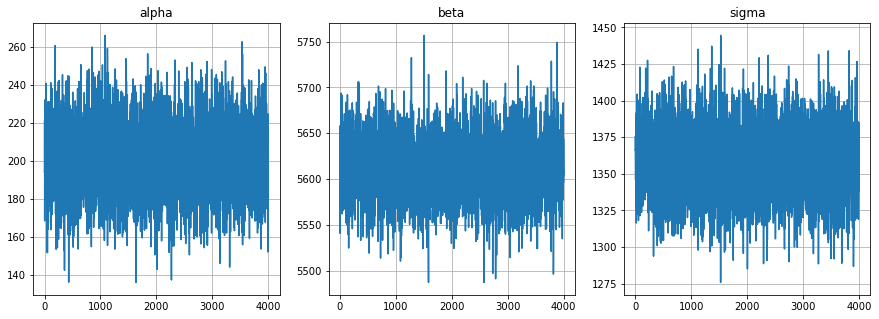

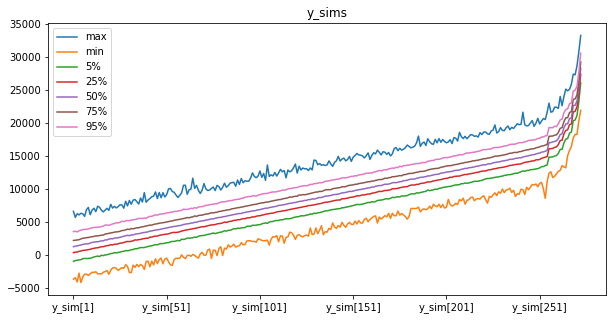

In [6]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axs[0].plot(df_alpha)
axs[0].grid()
axs[0].set_title('alpha')
axs[1].plot(df_beta)
axs[1].grid()
axs[1].set_title('beta')
axs[2].plot(df_sigma)
axs[2].grid()
axs[2].set_title('sigma')
plt.show()

data = result_lr.draws_pd()
y_sims = data[data.columns[10:]]

quans = pd.DataFrame({'max': y_sims.max(), 'min': y_sims.min(), '5%': y_sims.quantile(0.05), '25%': y_sims.quantile(0.25), '50%': y_sims.quantile(0.5), '75%': y_sims.quantile(0.75), '95%': y_sims.quantile(0.95)})
quans.plot(figsize=(10,5))
plt.title("y_sims")
plt.show()

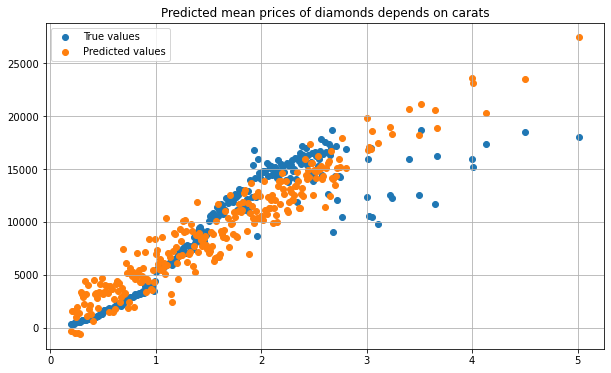

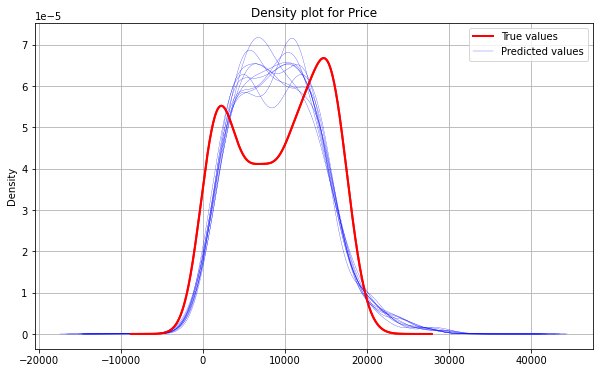

In [7]:
y_sim = result_lr.stan_variable('y_sim')
plt.figure(figsize=[10,6])
plt.scatter(df.carat.values, df.price.values)
plt.scatter(df.carat.values, y_sim[1])
plt.title("Predicted mean prices of diamonds depends on carats")
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()


df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
for i in range(0,10):
    y_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
plt.title('Density plot for Price')
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()

### Model 2 - Polynomial regression

In [8]:
model_pr = CmdStanModel(stan_file='model_pr.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [9]:
result_pr = model_pr.sample(data=dict(N=len(df), x=df.carat.values, y=df.price.values))
print(result_pr.draws_pd())

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -3114.90       0.999264    0.006769          5.0          31.0   
1    -3113.02       0.907593    0.006769          7.0         127.0   
2    -3112.62       0.946056    0.006769          6.0         127.0   
3    -3115.21       0.952662    0.006769          5.0          31.0   
4    -3113.56       0.921614    0.006769          5.0          63.0   
...       ...            ...         ...          ...           ...   
3995 -3116.77       0.952194    0.075965          6.0          63.0   
3996 -3115.06       0.987039    0.075965          4.0          15.0   
3997 -3114.81       0.940448    0.075965          5.0          63.0   
3998 -3115.14       0.900154    0.075965          6.0          63.0   
3999 -3115.05       0.996787    0.075965          6.0          63.0   

      divergent__  energy__    alpha     beta    gamma  ...  y_sim[264]  \
0             0.0   3121.43  619.802 -4031.10  12863.1  ...     14063.8

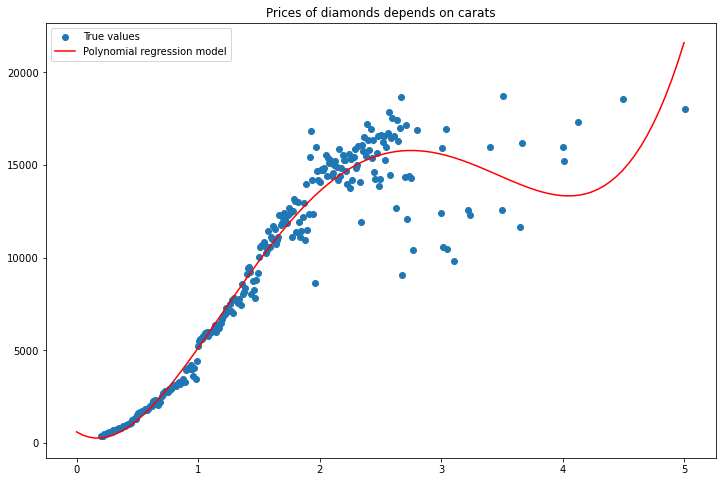

In [10]:
df_alpha = pd.DataFrame(result_pr.stan_variables()["alpha"])
df_beta = pd.DataFrame(result_pr.stan_variables()["beta"])
df_gamma = pd.DataFrame(result_pr.stan_variables()["gamma"])
df_delta = pd.DataFrame(result_pr.stan_variables()["delta"])
df_eps = pd.DataFrame(result_pr.stan_variables()["eps"])
df_sigma = pd.DataFrame(result_pr.stan_variables()["sigma"])

alpha = df_alpha.mean().to_numpy()
beta = df_beta.mean().to_numpy()
gamma = df_gamma.mean().to_numpy()
delta = df_delta.mean().to_numpy()
eps = df_eps.mean().to_numpy()

sigma= df_sigma.mean().to_numpy()

x = np.linspace(0, 5, 100)
y = alpha + beta*x + gamma*(x**2) + delta*(x**3) + eps*(x**4)

plt.figure(figsize=[12, 8])
plt.scatter(df.carat.values, df.price.values)
plt.plot(x, y, "-r")
plt.title("Prices of diamonds depends on carats")
plt.legend(["True values", "Polynomial regression model"])
plt.show()

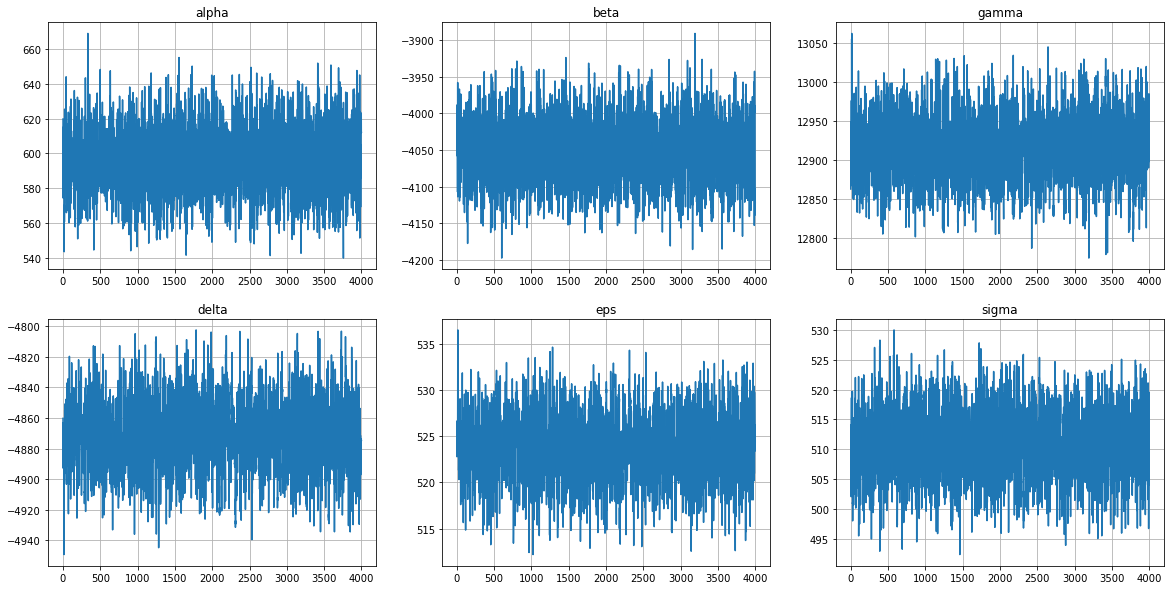

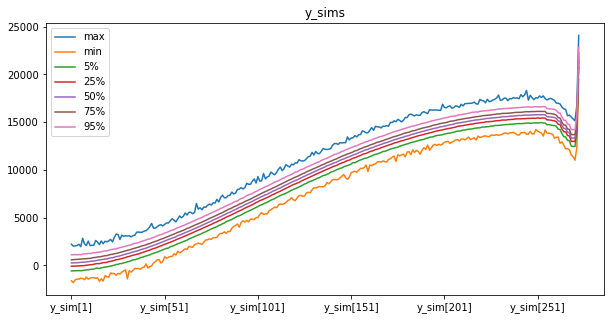

In [11]:
fig, axs = plt.subplots(2,3)
fig.set_size_inches(20, 10)
axs[0][0].plot(df_alpha)
axs[0][0].grid()
axs[0][0].set_title('alpha')
axs[0][1].plot(df_beta)
axs[0][1].grid()
axs[0][1].set_title('beta')
axs[0][2].plot(df_gamma)
axs[0][2].grid()
axs[0][2].set_title('gamma')
axs[1][0].plot(df_delta)
axs[1][0].grid()
axs[1][0].set_title('delta')
axs[1][1].plot(df_eps)
axs[1][1].grid()
axs[1][1].set_title('eps')
axs[1][2].plot(df_sigma)
axs[1][2].grid()
axs[1][2].set_title('sigma')
plt.show()

data = result_pr.draws_pd()
y_sims = data[data.columns[13:]]

quans = pd.DataFrame({'max': y_sims.max(), 'min': y_sims.min(), '5%': y_sims.quantile(0.05), '25%': y_sims.quantile(0.25), '50%': y_sims.quantile(0.5), '75%': y_sims.quantile(0.75), '95%': y_sims.quantile(0.95)})
quans.plot(figsize=(10,5))
plt.title("y_sims")
plt.show()

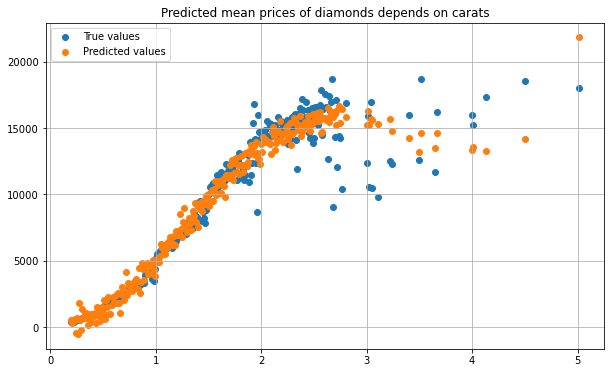

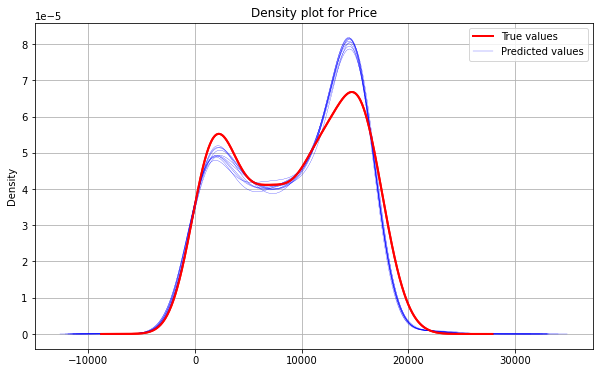

In [12]:
y_sim = result_pr.stan_variable('y_sim')

plt.figure(figsize=[10,6])
plt.scatter(df.carat.values, df.price.values)
plt.scatter(df.carat.values, y_sim[1])
plt.title("Predicted mean prices of diamonds depends on carats")
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()


df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
for i in range(0,10):
    y_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
plt.title('Density plot for Price')
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()

### Model 3 - Gaussian process

In [13]:
model_gp_opt = CmdStanModel(stan_file='model_gp_opt.stan')
data = dict(N_obs = len(df.price.values), x_obs = df.carat.values, y_obs = df.price.values)
result_gp_opt = model_gp_opt.optimize(data=data, algorithm='Newton')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
model_gp = CmdStanModel(stan_file='model_gp.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [15]:
# x_predict = np.linspace(0.2,5,len(df.price.values),endpoint=True)
x_predict = df.price.values
#observed_idx = rd.sample(range(1, 2*len(df.price.values)), len(df.price.values))
#observed_idx.sort()
observed_idx = range(1, len(df.price.values)+1)

result = result_gp_opt.optimized_params_pd

alpha = float(result['alpha'])
rho = float(result['rho'])
sigma = float(result['sigma'])

print(alpha)
print(rho)
print(sigma)

alpha = 250
rho = 250
sigma = 250

10131.3
1.16813
1163.72


In [16]:
data = dict(N_predict = len(x_predict), x_predict = x_predict, N_obs = len(df.price.values), y_obs = df.price.values, observed_idx = observed_idx, rho=rho, alpha=alpha, sigma=sigma)
result_gp = model_gp.sample(data=data)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [17]:
data = result_gp.draws_pd()
y_sims = data[data.columns[553:]]

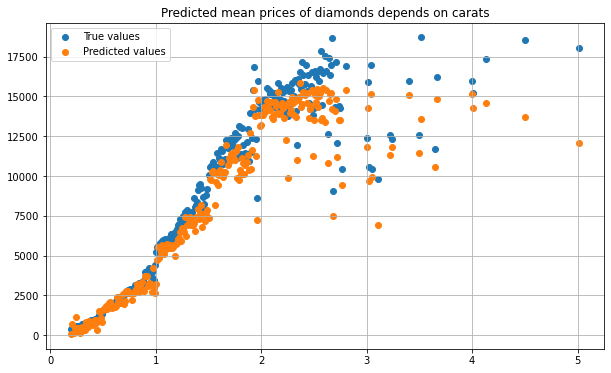

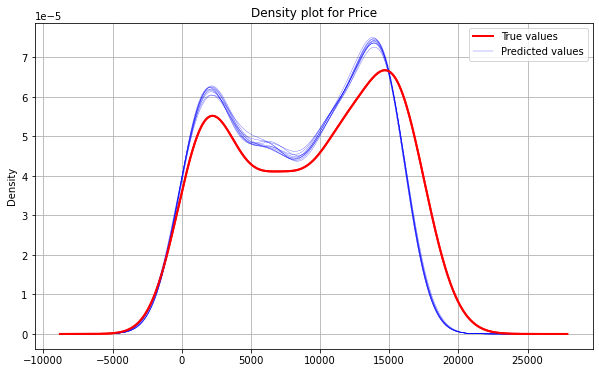

In [18]:
y_sim = result_gp.stan_variable('y_predict')

plt.figure(figsize=[10,6])
plt.scatter(df.carat.values, df.price.values)
plt.scatter(df.carat.values, y_sim[0])
plt.title("Predicted mean prices of diamonds depends on carats")
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()

df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
for i in range(0,10):
    y_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
plt.title('Density plot for Price')
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()